# Predictive Analytics with Random Forests and Extremely Random Forests 

## Ensemble Learning

Ensemble learning involves building multiple models, then combining them to produce a better results than having a model individually. While selecting the model, it is very important to choose a model with the smallest error on the training dataset. However, this approach does not always work. The model might become overfit the training dataset or biased. One of the reason why we do ensemble learning is because this reduces the overall risk of making a poor model selection. Among ensemble learning algorithms, one of the most popular and widely used is Random Forest.

## Random Forests and Extremely Random Forests 
Random Forest is a specialized ensemble learning method based on decision trees and bagging. It improves performance by combining multiple trees and introducing randomness in data and features, which reduces overfitting and variance. One of the benefits of random forests is that they do not overfit. Extremely random forests takes randomness to the next level. Similar like a random forest, the thresholds are chosen randomly as well. 

## Building Random Forest and Extremely Random Forest Classifiers

Let's see how to build a classifier based on random forest and extremely random forest in Python. Following packages are imported. 

In [33]:
import argparse 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from utilities import visualize_classifier 

#### Step 1 Setup the model
Define argument parser for Python, so that we can take the classifier type as an input parameter. Depending on this parameter, we can construct which classifier to use, either RandomForest or ExtraRandomForeset classifier. 

In [34]:
#Argument parser
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \
            Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type',
            required=True, choices=['rf', 'erf'], help="Type of classifier \
                    to use; can be either 'rf' or 'erf'")
    return parser

#### Step 2 Define the 'main' function and parse the input arguments

In [35]:
import sys
sys.argv = ['Random_Forest.py', '--classifier-type', 'rf']  # Example: Simulating passing 'rf' as the classifier type

if __name__ == '__main__':
    # Parse the input arguments
    args = build_arg_parser().parse_args()
    classifier_type = args.classifier_type
    print("Classifier type:", classifier_type)


Classifier type: rf


#### Step 3 Load data, Assign X and Y, Separate class based on input data 
Load the data called 'data_random_forests.txt'. It is a comma-separated values. The first two values related to input data and last two values corresponds to the target label. We have three distinct cases in this dataset. After loading the data, I will separate the inpute value into three classes. 

In [20]:
#Load the data 
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter = ',') 
print(data)

[[5.88 6.2  0.  ]
 [5.7  3.59 1.  ]
 [3.42 4.47 2.  ]
 ...
 [6.11 4.65 0.  ]
 [7.57 3.97 1.  ]
 [3.89 4.13 2.  ]]


In [29]:
X = data[:,:-1]
y = data[:, -1] 

In [25]:
#Separate the input data into three classes 
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2]) 

Let's visualize the input data. 

Text(0.5, 1.0, 'Input Data')

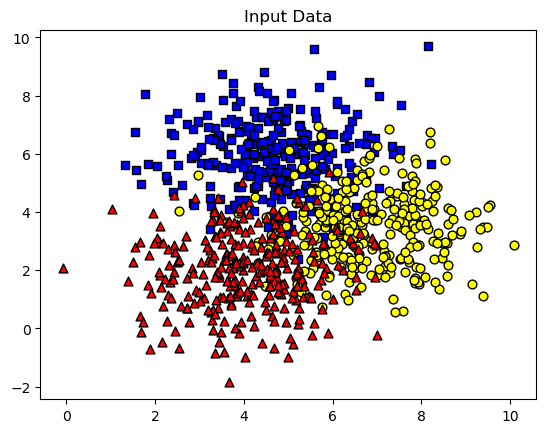

In [28]:
#Visualize the input data
plt.figure ()
plt.scatter(class_0[:,0], class_0[:, 1], s=40, 
            facecolors = 'blue', edgecolor = 'black', linewidth = 1, marker = 's') 
plt.scatter(class_1[:,0], class_1[:, 1], s= 40,
            facecolors = 'yellow', edgecolor = 'black', linewidth = 1, marker = 'o') 
plt.scatter(class_2[:,0], class_2[:,1], s= 40, 
            facecolors = 'red', edgecolor = 'black', linewidth = 1, marker = '^') 
plt.title('Input Data')

#### Step 4 Split the data into training and testing dataset

In [32]:
#Split data into training and testing dataset. 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state = 5) 

#### Step 5 Initiating Emsemble Learning classifier 

In [37]:
params = {'n_estimators': 100, 'max_depth':4,
          'random_state':0}

Note: Depending on the input parameter, we either construct a random forest or an extremely random foreset classifier. 

In [40]:
if classifier_type == 'rf': 
    classifier = RandomForestClassifier(**params)
else: 
    classifier = ExtraTeesClassifier(**params) 

##### Train and Visualize the classifier 

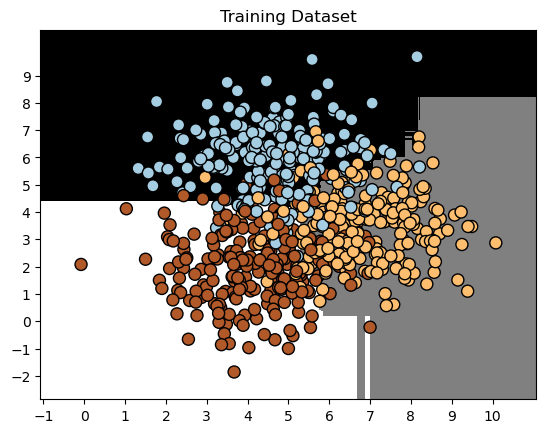

In [41]:
classifier.fit(X_train, y_train) 
visualize_classifier(classifier, X_train, y_train, 'Training Dataset') 

#### Step 6: Predict output (y) based on test_data 

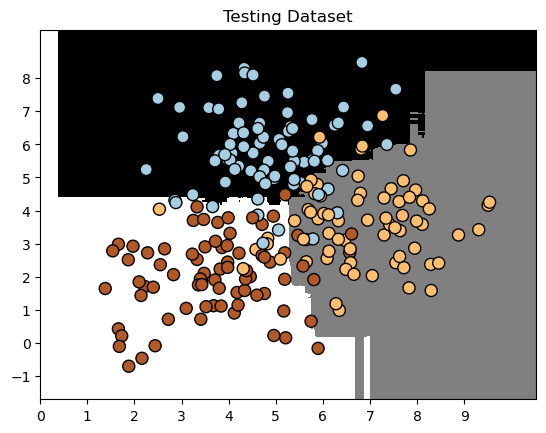

In [45]:
y_test_pred = classifier.predict(X_test) 
visualize_classifier(classifier, X_test, y_test, 'Testing Dataset')

#### Step 7: Evaluate the Classifier Performance

In [47]:
# Evaluate the classifier performance by printing classifier report.
class_name = ['Class_0', 'Class_1', 'Class_2'] 
print ("\n" + "#"*40) 
print ("\nClassifier performance on training dataset\n")
print (classification_report(y_train, 
                             classifier.predict(X_train), target_names = class_name)) 
print("#"*40 + "\n") 

print ("\n" + "#"*40) 
print ("\nClassifier performance on testing dataset\n") 
print (classification_report(y_test, y_test_pred, target_names = class_name)) 
print ("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class_0       0.91      0.86      0.88       221
     Class_1       0.84      0.87      0.86       230
     Class_2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################


########################################

Classifier performance on testing dataset

              precision    recall  f1-score   support

     Class_0       0.92      0.85      0.88        79
     Class_1       0.86      0.84      0.85        70
     Class_2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

#######################

The above report indicates the performance of training and testing dataset. 
For training dataset, class_0 seems to have highest precision with 0.91 while class_1 and class_2 resulted as 0.84 and 0.86. Recall and f1 score does not really have much significant difference among classes. However, class_0 have relatively balanced scores referring high level of precision and f1-score. 

For testing dataset, the overall metric result of precision, recall and f1 score are similar like those in training dataset. class_0 precision is also leading with 0.92. But recall score of Class_2 is noticably high at 0.92. 

As an overall, the model shows consistent accuracy and balanced precision, recall, and F1-scores between training and testing, indicating it generalizes well.

In [52]:
 # Compute confidence
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

print("\nConfidence measure:")
for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\nDatapoint:', datapoint)
        print('Predicted class:', predicted_class) 



Confidence measure:

Datapoint: [5 5]
Predicted class: Class-0

Datapoint: [3 6]
Predicted class: Class-0

Datapoint: [6 4]
Predicted class: Class-1

Datapoint: [7 2]
Predicted class: Class-1

Datapoint: [4 4]
Predicted class: Class-2

Datapoint: [5 2]
Predicted class: Class-2


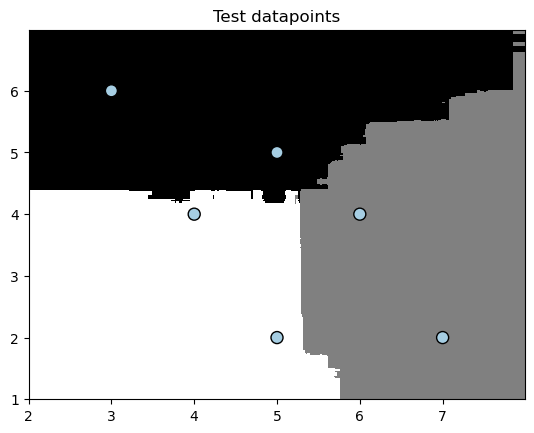

In [54]:
# Visualize the datapoints
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 
            'Test datapoints')
plt.show()